In [1]:
# %% [markdown]
# # Jupyter Notebook Loading Header
#
# This is a custom loading header for Jupyter Notebooks in Visual Studio Code.
# It includes common imports and settings to get you started quickly.

# %% [markdown]
## Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.cloud import bigquery
import os
path = r'C:\Users\DwaipayanChakroborti\AppData\Roaming\gcloud\legacy_credentials\dchakroborti@tonikbank.com\adc.json'
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = path
client = bigquery.Client(project='prj-prod-dataplatform')

# %% [markdown]
## Configure Settings
# Set options or configurations as needed
# Example: pd.set_option('display.max_columns', None)

C:\Users\DwaipayanChakroborti\AppData\Roaming\Python\Python310\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Total Customers Count

In [2]:
sq = """select distinct cust_id from prj-prod-dataplatform.dl_customers_db_raw.tdbk_customer_mtb where cust_id is not null;"""
d = client.query(sq).to_dataframe(progress_bar_type='tqdm')
d['Description'] = "Total Distinct Registered Customer"
d['Set'] = 'Overall'
d['Serialno'] = '1.0'
d.head()


Job ID 447a9733-dcda-436f-b4ad-80c1f28c1d01 successfully executed: 100%|██████████|
Downloading: 100%|██████████|


,cust_id,Description,Set,Serialno
0,1087481,Total Distinct Registered Customer,Overall,1.0
1,1391402,Total Distinct Registered Customer,Overall,1.0
2,1391437,Total Distinct Registered Customer,Overall,1.0
3,1390518,Total Distinct Registered Customer,Overall,1.0
4,1390381,Total Distinct Registered Customer,Overall,1.0


In [3]:
d.rename(columns= {'cust_id':'OFCUSTOMERID'}, inplace = True)

# Total TSA Distinct Customer in Customer Account and Customer MTB table

In [4]:
sq = """Select distinct OFCUSTOMERID from `core_raw.customer_accounts` where CRINTERDESC like 'Transactional Savings Account Inv_R' 
                and OFCUSTOMERID in (select distinct cust_id from prj-prod-dataplatform.dl_customers_db_raw.tdbk_customer_mtb where cust_id is not null);"""
d1 = client.query(sq).to_dataframe(progress_bar_type='tqdm')
d1['Description'] = "Total TSA Customer Ever Registered"
d1['Set'] = 'Subset of 1.0'
d1['Serialno'] = '1.1'
d1.head()

Job ID 4a516b8e-640f-487a-88a8-b92f6706e227 successfully executed: 100%|██████████|
Downloading: 100%|██████████|


,OFCUSTOMERID,Description,Set,Serialno
0,2006727,Total TSA Customer Ever Registered,Subset of 1.0,1.1
1,2007330,Total TSA Customer Ever Registered,Subset of 1.0,1.1
2,2007196,Total TSA Customer Ever Registered,Subset of 1.0,1.1
3,2006465,Total TSA Customer Ever Registered,Subset of 1.0,1.1
4,2007635,Total TSA Customer Ever Registered,Subset of 1.0,1.1


In [5]:
merged_df = pd.concat([d, d1], ignore_index=False)
print(f"Merged DataFrame Shape: {merged_df.shape}")
merged_df['Description'].value_counts()

Merged DataFrame Shape: (2808442, 4)


Description
Total Distinct Registered Customer    1478585
Total TSA Customer Ever Registered    1329857
Name: count, dtype: int64

In [6]:
sorted_counts = merged_df.groupby(['Description', 'Set', 'Serialno'])['OFCUSTOMERID'].nunique().reset_index()
sorted_counts_sorted = sorted_counts.sort_values(by='Serialno')
sorted_counts_sorted


,Description,Set,Serialno,OFCUSTOMERID
0,Total Distinct Registered Customer,Overall,1.0,1478585
1,Total TSA Customer Ever Registered,Subset of 1.0,1.1,1329857


# Total Registered Customer who do not have TSA Account

In [7]:
sq = """select distinct cust_id from prj-prod-dataplatform.dl_customers_db_raw.tdbk_customer_mtb where cust_id is not null
and cust_id not in (Select distinct OFCUSTOMERID from `core_raw.customer_accounts` where CRINTERDESC like 'Transactional Savings Account Inv_R');"""
d2 = client.query(sq).to_dataframe(progress_bar_type='tqdm')
d2['Description'] = "Total Customer Ever Registered But Not Opened TSA Account"
d2['Set'] = 'Subset of 1.0'
d2['Serialno'] = '1.2'
d2.head()

Job ID 267f5365-6216-4c3e-9180-077ed58b301d successfully executed: |          |   
Downloading: 100%|██████████|


,cust_id,Description,Set,Serialno
0,2134751,Total Customer Ever Registered But Not Opened ...,Subset of 1.0,1.2
1,2134902,Total Customer Ever Registered But Not Opened ...,Subset of 1.0,1.2
2,2135461,Total Customer Ever Registered But Not Opened ...,Subset of 1.0,1.2
3,2135420,Total Customer Ever Registered But Not Opened ...,Subset of 1.0,1.2
4,2316558,Total Customer Ever Registered But Not Opened ...,Subset of 1.0,1.2


In [8]:
d2.rename(columns= {'cust_id':'OFCUSTOMERID'}, inplace = True)

In [9]:
merged_df = pd.concat([d, d1, d2], ignore_index=False)
print(f"Merged DataFrame Shape: {merged_df.shape}")
merged_df['Description'].value_counts()

Merged DataFrame Shape: (2957170, 4)


Description
Total Distinct Registered Customer                           1478585
Total TSA Customer Ever Registered                           1329857
Total Customer Ever Registered But Not Opened TSA Account     148728
Name: count, dtype: int64

In [10]:
sorted_counts = merged_df.groupby(['Description', 'Set', 'Serialno'])['OFCUSTOMERID'].nunique().reset_index()
sorted_counts_sorted = sorted_counts.sort_values(by='Serialno')
sorted_counts_sorted


,Description,Set,Serialno,OFCUSTOMERID
1,Total Distinct Registered Customer,Overall,1.0,1478585
2,Total TSA Customer Ever Registered,Subset of 1.0,1.1,1329857
0,Total Customer Ever Registered But Not Opened ...,Subset of 1.0,1.2,148728


# TSA Customer Account Not found in Customer MTB table

In [11]:
sq = """Select distinct OFCUSTOMERID from `core_raw.customer_accounts` where CRINTERDESC like 'Transactional Savings Account Inv_R'
and OFCUSTOMERID not in (select distinct cust_id from prj-prod-dataplatform.dl_customers_db_raw.tdbk_customer_mtb where cust_id is not null);"""
d3 = client.query(sq).to_dataframe(progress_bar_type='tqdm')
d3['Description'] = "Total TSA Customer Ever Opened TSA Account but not registered"
d3['Set'] = 'Subset of 1'
d3['Serialno'] = '1.3'
d3.head()

Job ID a0fdbb88-c253-4819-bf5e-3a17117bccbf successfully executed: 100%|██████████|
Downloading: 100%|██████████|


,OFCUSTOMERID,Description,Set,Serialno
0,2066716,Total TSA Customer Ever Opened TSA Account but...,Subset of 1,1.3
1,2478955,Total TSA Customer Ever Opened TSA Account but...,Subset of 1,1.3
2,2478961,Total TSA Customer Ever Opened TSA Account but...,Subset of 1,1.3
3,1068061,Total TSA Customer Ever Opened TSA Account but...,Subset of 1,1.3
4,2478952,Total TSA Customer Ever Opened TSA Account but...,Subset of 1,1.3


In [12]:
merged_df = pd.concat([d, d1, d2, d3], ignore_index=False)
print(f"Merged DataFrame Shape: {merged_df.shape}")
merged_df['Description'].value_counts()

Merged DataFrame Shape: (2957181, 4)


Description
Total Distinct Registered Customer                               1478585
Total TSA Customer Ever Registered                               1329857
Total Customer Ever Registered But Not Opened TSA Account         148728
Total TSA Customer Ever Opened TSA Account but not registered         11
Name: count, dtype: int64

In [13]:
sorted_counts = merged_df.groupby(['Description', 'Set', 'Serialno'])['OFCUSTOMERID'].nunique().reset_index()
sorted_counts_sorted = sorted_counts.sort_values(by='Serialno')
sorted_counts_sorted

,Description,Set,Serialno,OFCUSTOMERID
1,Total Distinct Registered Customer,Overall,1.0,1478585
3,Total TSA Customer Ever Registered,Subset of 1.0,1.1,1329857
0,Total Customer Ever Registered But Not Opened ...,Subset of 1.0,1.2,148728
2,Total TSA Customer Ever Opened TSA Account but...,Subset of 1,1.3,11


# Total TSA Distinct Customers Who we closed

In [14]:
sq = """Select distinct OFCUSTOMERID from `core_raw.customer_accounts` where CRINTERDESC like 'Transactional Savings Account Inv_R'
        and OFCUSTOMERID in (select distinct cust_id from prj-prod-dataplatform.dl_customers_db_raw.tdbk_customer_mtb where cust_id is not null)
        and OFISCLOSED = 'Y'
        and OFCUSTOMERID not in (Select distinct OFCUSTOMERID from `core_raw.customer_accounts` where CRINTERDESC like 'Transactional Savings Account Inv_R' and  OFISCLOSED = 'N')
        ;
    """
d4 = client.query(sq).to_dataframe(progress_bar_type='tqdm')
d4['Description'] = "Total TSA Distinct Customers which we closed"
d4['Set'] = 'Subset of 1.1'
d4['Serialno'] = '1.1a'
d4.head()

Job ID 93c67dc2-4450-495d-86b7-735a8e0da43b successfully executed: 100%|██████████|
Downloading: 100%|██████████|


,OFCUSTOMERID,Description,Set,Serialno
0,1008633,Total TSA Distinct Customers which we closed,Subset of 1.1,1.1a
1,1009765,Total TSA Distinct Customers which we closed,Subset of 1.1,1.1a
2,1010164,Total TSA Distinct Customers which we closed,Subset of 1.1,1.1a
3,1009701,Total TSA Distinct Customers which we closed,Subset of 1.1,1.1a
4,1009029,Total TSA Distinct Customers which we closed,Subset of 1.1,1.1a


In [15]:
merged_df = pd.concat([d, d1, d2, d3, d4], ignore_index=False)
print(f"Merged DataFrame Shape: {merged_df.shape}")
merged_df['Description'].value_counts()

Merged DataFrame Shape: (3748323, 4)


Description
Total Distinct Registered Customer                               1478585
Total TSA Customer Ever Registered                               1329857
Total TSA Distinct Customers which we closed                      791142
Total Customer Ever Registered But Not Opened TSA Account         148728
Total TSA Customer Ever Opened TSA Account but not registered         11
Name: count, dtype: int64

In [16]:
sorted_counts = merged_df.groupby(['Description', 'Set', 'Serialno'])['OFCUSTOMERID'].nunique().reset_index()
sorted_counts_sorted = sorted_counts.sort_values(by='Serialno')
sorted_counts_sorted


,Description,Set,Serialno,OFCUSTOMERID
1,Total Distinct Registered Customer,Overall,1.0,1478585
3,Total TSA Customer Ever Registered,Subset of 1.0,1.1,1329857
4,Total TSA Distinct Customers which we closed,Subset of 1.1,1.1a,791142
0,Total Customer Ever Registered But Not Opened ...,Subset of 1.0,1.2,148728
2,Total TSA Customer Ever Opened TSA Account but...,Subset of 1,1.3,11


# Total TSA Customer which is Open

In [17]:
sq = """Select distinct OFCUSTOMERID from `core_raw.customer_accounts` where CRINTERDESC like 'Transactional Savings Account Inv_R'
and OFCUSTOMERID in (select distinct cust_id from prj-prod-dataplatform.dl_customers_db_raw.tdbk_customer_mtb where cust_id is not null)
and OFISCLOSED = 'N'
;"""

d5 = client.query(sq).to_dataframe(progress_bar_type='tqdm')
d5['Description'] = "Total TSA Distinct Customers which is Open"
d5['Set'] = 'Subset of 1.1'
d5['Serialno'] = '1.1b'
d5.head()

Job ID d3fcfa0a-d29c-45c4-981e-9125a205ced7 successfully executed: |          |   
Downloading: 100%|██████████|


,OFCUSTOMERID,Description,Set,Serialno
0,1041125,Total TSA Distinct Customers which is Open,Subset of 1.1,1.1b
1,1850597,Total TSA Distinct Customers which is Open,Subset of 1.1,1.1b
2,1850153,Total TSA Distinct Customers which is Open,Subset of 1.1,1.1b
3,1850174,Total TSA Distinct Customers which is Open,Subset of 1.1,1.1b
4,1863910,Total TSA Distinct Customers which is Open,Subset of 1.1,1.1b


In [18]:
merged_df = pd.concat([d, d1, d2, d3, d4, d5], ignore_index=False)
print(f"Merged DataFrame Shape: {merged_df.shape}")
merged_df['Description'].value_counts()

Merged DataFrame Shape: (4287038, 4)


Description
Total Distinct Registered Customer                               1478585
Total TSA Customer Ever Registered                               1329857
Total TSA Distinct Customers which we closed                      791142
Total TSA Distinct Customers which is Open                        538715
Total Customer Ever Registered But Not Opened TSA Account         148728
Total TSA Customer Ever Opened TSA Account but not registered         11
Name: count, dtype: int64

In [19]:
sorted_counts = merged_df.groupby(['Description', 'Set', 'Serialno'])['OFCUSTOMERID'].nunique().reset_index()
sorted_counts_sorted = sorted_counts.sort_values(by='Serialno')
sorted_counts_sorted


,Description,Set,Serialno,OFCUSTOMERID
1,Total Distinct Registered Customer,Overall,1.0,1478585
3,Total TSA Customer Ever Registered,Subset of 1.0,1.1,1329857
5,Total TSA Distinct Customers which we closed,Subset of 1.1,1.1a,791142
4,Total TSA Distinct Customers which is Open,Subset of 1.1,1.1b,538715
0,Total Customer Ever Registered But Not Opened ...,Subset of 1.0,1.2,148728
2,Total TSA Customer Ever Opened TSA Account but...,Subset of 1,1.3,11


# MAU 

So, new definition of MAU is. Customer with open TSA and at least one any transaction for the amount greater than 100 PHP in the last 30 days. No active loan. OR has balance of the TSA + any Stash greater than 100 PHP. Whoch means if he didnt transact but he has money on TSA - he is MAU. If he doesnt transact and doesnt have money on TSA but has more than 100 PHP on Stash - he is active 

In [20]:
sq = """with
loan_cust --list of customers having active loan
        AS (
        SELECT 
            distinct CAST(customerId AS STRING) customerId
        FROM 
            `prj-prod-dataplatform.risk_credit_mis.loan_master_table`
        WHERE 
            loanPaidStatus IN ('Normal', 'In Arrears')),
opentsacust -- list of open tsa customers
AS (Select distinct OFCUSTOMERID from `core_raw.customer_accounts` where CRINTERDESC like 'Transactional Savings Account Inv_R'
and OFCUSTOMERID in (select distinct cust_id from prj-prod-dataplatform.dl_customers_db_raw.tdbk_customer_mtb where cust_id is not null)
and OFISCLOSED = 'N'),
b as --- transaction in last 30 days more than 100 pesos
(Select customer_id, 
max(date(current_date())) currentdate,
max(date_sub(current_date(), interval 1 month)) onemonthbackdate,
sum(case when date(transaction_date) between date_sub(current_date(), interval 1 month) and date(current_date())  then trx_amount else 0 end) transactions
from `risk_mart.customer_transactions`
where customer_id not in (select customerId from loan_cust)
and customer_id in (select OFCUSTOMERID from opentsacust)
group by 1
),
otherpart as --list of customer who have balance of more than 100 pesos in any of the accounts
(select OFCUSTOMERID,sum(OFCLEAREDBALANCE) from `prj-prod-dataplatform.core_raw.customer_accounts`
where
 OFPRODUCTCATEGORY in ('SaveForFuture','savings','fixdep')
 and CRINTERDESC in ('Transactional Savings Account Inv_R','Group stash Account_R','Stash Account Inv_R','REGULAR FD - Per - PHP -9 mon- R','REGULAR FD - Per - PHP -12 mon- R','REGULAR FD - Per - PHP -6 mon- R','Medium FD - Per - PHP - 24mon- R')
group by 1
having  sum(OFCLEAREDBALANCE) > 100)
select distinct customer_id from b where transactions >= 100
union distinct
(select distinct OFCUSTOMERID from otherpart)"""
d6 = client.query(sq).to_dataframe(progress_bar_type='tqdm')
d6['Description'] = "MAU as per New Definition"
d6['Set'] = 'Set 2'
d6['Serialno'] = '2.0'
d6.head()


Job ID ddacb9ad-7f20-4896-acc9-fefe346568bb successfully executed: 100%|██████████|
Downloading: 100%|██████████|


,customer_id,Description,Set,Serialno
0,1039322,MAU as per New Definition,Set 2,2.0
1,1010057,MAU as per New Definition,Set 2,2.0
2,1058414,MAU as per New Definition,Set 2,2.0
3,1041172,MAU as per New Definition,Set 2,2.0
4,1913464,MAU as per New Definition,Set 2,2.0


In [21]:
d6.rename(columns={'customer_id':'OFCUSTOMERID'}, inplace = True)

In [22]:
merged_df = pd.concat([d, d1, d2, d3, d4, d5, d6], ignore_index=False)
print(f"Merged DataFrame Shape: {merged_df.shape}")
merged_df['Description'].value_counts()

Merged DataFrame Shape: (4371566, 4)


Description
Total Distinct Registered Customer                               1478585
Total TSA Customer Ever Registered                               1329857
Total TSA Distinct Customers which we closed                      791142
Total TSA Distinct Customers which is Open                        538715
Total Customer Ever Registered But Not Opened TSA Account         148728
MAU as per New Definition                                          84528
Total TSA Customer Ever Opened TSA Account but not registered         11
Name: count, dtype: int64

In [23]:
sorted_counts = merged_df.groupby(['Description', 'Set', 'Serialno'])['OFCUSTOMERID'].nunique().reset_index()
sorted_counts_sorted = sorted_counts.sort_values(by='Serialno')
sorted_counts_sorted


,Description,Set,Serialno,OFCUSTOMERID
2,Total Distinct Registered Customer,Overall,1.0,1478585
4,Total TSA Customer Ever Registered,Subset of 1.0,1.1,1329857
6,Total TSA Distinct Customers which we closed,Subset of 1.1,1.1a,791142
5,Total TSA Distinct Customers which is Open,Subset of 1.1,1.1b,538715
1,Total Customer Ever Registered But Not Opened ...,Subset of 1.0,1.2,148728
3,Total TSA Customer Ever Opened TSA Account but...,Subset of 1,1.3,11
0,MAU as per New Definition,Set 2,2.0,84528


# MMAU

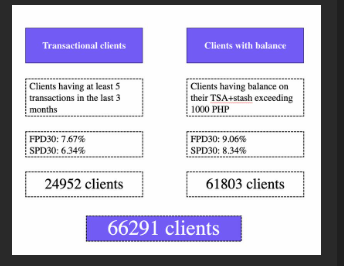

In [24]:
sq = """with 
opentsacust -- list of open tsa customers
AS (Select distinct OFCUSTOMERID from `core_raw.customer_accounts` where CRINTERDESC like 'Transactional Savings Account Inv_R'
and OFCUSTOMERID in (select distinct cust_id from prj-prod-dataplatform.dl_customers_db_raw.tdbk_customer_mtb where cust_id is not null)
and OFISCLOSED = 'N'),
b as --Marek's first criteria
(select customer_id, count(customer_id) cnt from `risk_mart.customer_transactions`
where status = 'Success'
and abs(trx_amount) > 0
and date(transaction_date) between date_sub(current_date(), interval 3 month) and current_date()
group by 1
)
select customer_id from b where cnt >= 5
union distinct 
(with b as  --- Marek's second criteria
(select client_id, count(distinct account_type) typesofaccounts, sum(clearedbalance) totalbalance 
from `risk_mart.customer_balance`
WHERE balanceDateAsOf = date_sub(current_date(), interval 1 day)
 group by 1 having sum(clearedbalance) > 1000
)
select client_id from b
);
"""

d7 = client.query(sq).to_dataframe(progress_bar_type='tqdm')
d7['Description'] = "MMAU"
d7['Set'] = 'Set 3'
d7['Serialno'] = '3.0'
d7.head()

Job ID 9daeabd3-4d99-4215-84cf-1753dc429f56 successfully executed: 100%|██████████|
Downloading: 100%|██████████|


,customer_id,Description,Set,Serialno
0,1033607,MMAU,Set 3,3.0
1,1033001,MMAU,Set 3,3.0
2,1064278,MMAU,Set 3,3.0
3,1590966,MMAU,Set 3,3.0
4,1223994,MMAU,Set 3,3.0


In [25]:
d7.rename(columns={'customer_id': 'OFCUSTOMERID'}, inplace = True)

In [26]:
merged_df = pd.concat([d, d1, d2, d3, d4, d5, d6, d7], ignore_index=False)
print(f"Merged DataFrame Shape: {merged_df.shape}")
merged_df['Description'].value_counts()

Merged DataFrame Shape: (4433654, 4)


Description
Total Distinct Registered Customer                               1478585
Total TSA Customer Ever Registered                               1329857
Total TSA Distinct Customers which we closed                      791142
Total TSA Distinct Customers which is Open                        538715
Total Customer Ever Registered But Not Opened TSA Account         148728
MAU as per New Definition                                          84528
MMAU                                                               62088
Total TSA Customer Ever Opened TSA Account but not registered         11
Name: count, dtype: int64

In [27]:
sorted_counts = merged_df.groupby(['Description', 'Set', 'Serialno'])['OFCUSTOMERID'].nunique().reset_index()
sorted_counts_sorted = sorted_counts.sort_values(by='Serialno')
sorted_counts_sorted


,Description,Set,Serialno,OFCUSTOMERID
3,Total Distinct Registered Customer,Overall,1.0,1478585
5,Total TSA Customer Ever Registered,Subset of 1.0,1.1,1329857
7,Total TSA Distinct Customers which we closed,Subset of 1.1,1.1a,791142
6,Total TSA Distinct Customers which is Open,Subset of 1.1,1.1b,538715
2,Total Customer Ever Registered But Not Opened ...,Subset of 1.0,1.2,148728
4,Total TSA Customer Ever Opened TSA Account but...,Subset of 1,1.3,11
0,MAU as per New Definition,Set 2,2.0,84528
1,MMAU,Set 3,3.0,62088


# Share of open TSA to total registered users

In [28]:
import pandas as pd

# Assuming 'sorted_counts_sorted' is your sorted DataFrame

# Calculate the ratio
open_tsa_customers = sorted_counts_sorted.loc[sorted_counts_sorted['Description'] == 'Total TSA Distinct Customers which is Open', 'OFCUSTOMERID'].iloc[0]
total_registered_customers = sorted_counts_sorted.loc[sorted_counts_sorted['Description'] == 'Total Distinct Registered Customer', 'OFCUSTOMERID'].iloc[0]
ratio = round(open_tsa_customers / total_registered_customers, 2)

# Create a DataFrame with the calculated ratio
df = pd.DataFrame({
    'Description': ['Share of open TSA to total registered users'],
    'Set': ['Calculation of 1.0 and 1.1b'],
    'Serialno': ['1.1c'],
    'OFCUSTOMERID': [ratio]
})

df.head()


,Description,Set,Serialno,OFCUSTOMERID
0,Share of open TSA to total registered users,Calculation of 1.0 and 1.1b,1.1c,0.36


In [29]:
# Concatenate sorted_counts_sorted and df
sorted_counts_sorted = pd.concat([sorted_counts_sorted, df], ignore_index=True)

In [30]:
sorted_counts_sorted = sorted_counts_sorted.sort_values(by='Serialno')
sorted_counts_sorted

,Description,Set,Serialno,OFCUSTOMERID
0,Total Distinct Registered Customer,Overall,1.0,1478585.00
1,Total TSA Customer Ever Registered,Subset of 1.0,1.1,1329857.00
2,Total TSA Distinct Customers which we closed,Subset of 1.1,1.1a,791142.00
3,Total TSA Distinct Customers which is Open,Subset of 1.1,1.1b,538715.00
8,Share of open TSA to total registered users,Calculation of 1.0 and 1.1b,1.1c,0.36
4,Total Customer Ever Registered But Not Opened ...,Subset of 1.0,1.2,148728.00
5,Total TSA Customer Ever Opened TSA Account but...,Subset of 1,1.3,11.00
6,MAU as per New Definition,Set 2,2.0,84528.00
7,MMAU,Set 3,3.0,62088.00


In [31]:
sorted_counts_sorted.to_excel(r"Deposite_values20240423.xlsx", index = False)